In [1]:
import math 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 


def ff(x):
    return 100*math.exp(-10*x)
def exact(x):
    return 1-(1-math.exp(-10))*x-math.exp(-10*x)

In [2]:
def err(a): 
    n = 2**a
    h  = 1/n
    hh = h*h
    d  = np.linspace(0,n,n+1)
    e  = np.linspace(0,n-2,n-1)#errs
    f  = np.linspace(0,n,n+1)
    x  = np.linspace(0,n,n+1)
    u  = np.linspace(0,n,n+1)

    u[0]=u[n]=0
    d[0]=d[n]=2




    for i in range(0,n+1):
        x[i] = i*h
        f[i] = hh*ff(i*h);
    for i in range(1,n):
        d[i] = (i+1)/i
    for i in range(2,n):
        f[i] += f[i-1]/d[i-1]
    u[n-1] = f[n-1]/d[n-1]
    for i in range(n-1,0,-1):
        u[i] = (f[i]+u[i+1])/d[i]
    i=1 
    e[i-1] = math.log10(abs(u[i]-exact(x[i]))/exact(x[i]))
    return e[0]

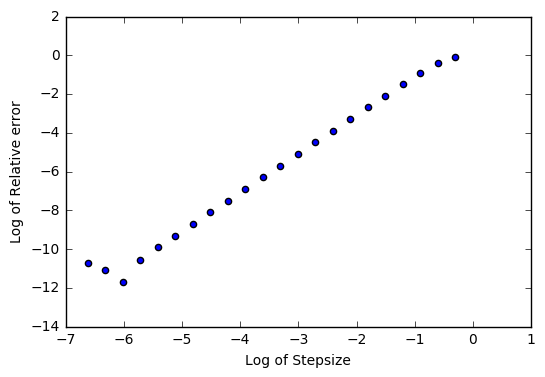

In [6]:
ns = range(1,23)
xvals = []
for i in ns:
    x = -math.log10(2**i)
    xvals.append(x)
es  = []
for i in ns:
    es.append(err(i))
plt.scatter(xvals ,es)
plt.ylabel('Log of Relative error')
plt.xlabel('Log of Stepsize')